## 1. Синтез и фильтрация М-последовательностей
#### 1.1
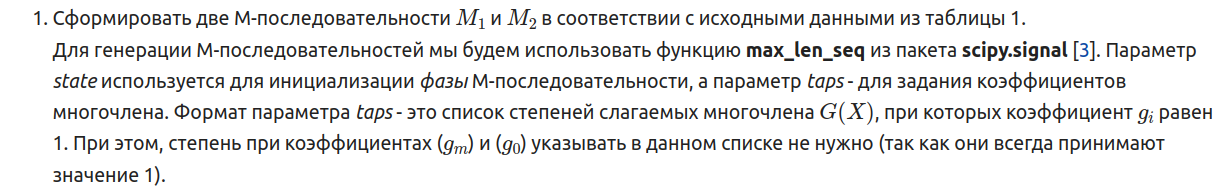<br>


taps1: [ 0.  4.  5.  8. 10.]
taps2: [ 0.  4.  5.  7.  8.  9. 10.]
M1_seq:     [1 0 0 ... 0 1 1]
M1_seq_len: 1023
M2_seq:     [1 0 0 ... 0 1 0]
M2_seq_len: 1023
M1_seq_sign: [-1  1  1 ...  1 -1 -1]
M2_seq_sign: [-1  1  1 ...  1 -1  1]
<class 'numpy.int32'>


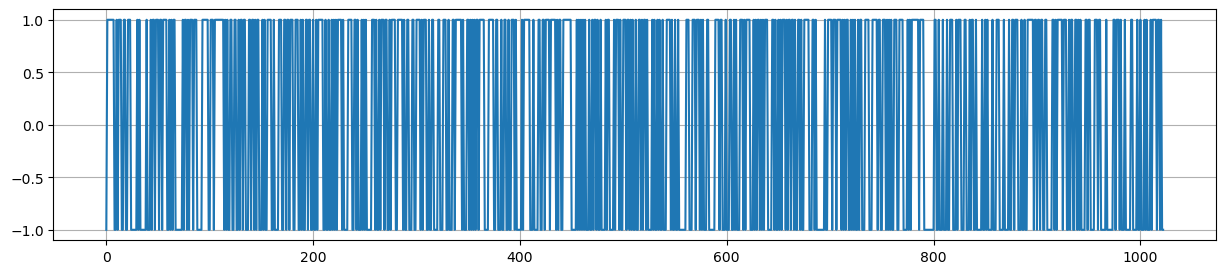

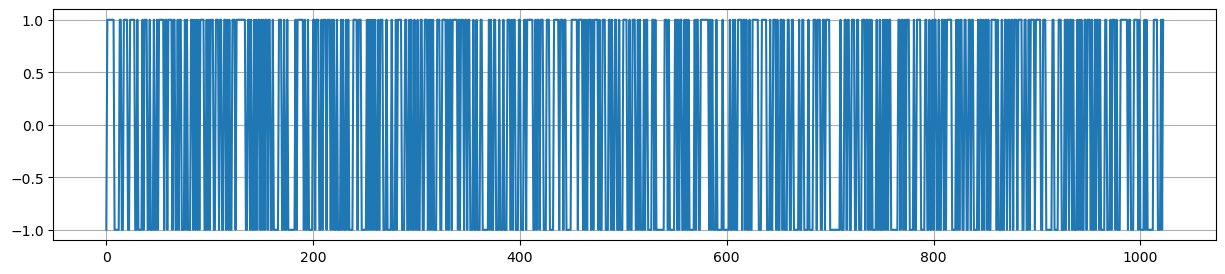

In [7]:
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt

A  = np.array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1])     # phase
C1 = np.array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1])  # characteristic polynomial #1
C2 = np.array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1])  # characteristic polynomial #2

taps1 = np.array([])
taps2 = np.array([])

for i in range(0, len(C1)):
  if C1[i] != 0:
    taps1 = np.append(taps1, i)
  if C2[i] != 0:
    taps2 = np.append(taps2, i)

print(f'taps1: {taps1}\ntaps2: {taps2}')

M_seq_len_param = len(A)

M1 = scipy.signal.max_len_seq(nbits=M_seq_len_param, state=A, taps=taps1)
M2 = scipy.signal.max_len_seq(nbits=M_seq_len_param, state=A, taps=taps2)

M_seq_len = len(M1[0]);

print(f'M1_seq:     {M1[0]}')
print(f'M1_seq_len: {len(M1[0])}')
print(f'M2_seq:     {M2[0]}')
print(f'M2_seq_len: {len(M2[0])}')

# cast to np.array
M1_arr = np.array(M1[0], dtype=np.int32)
M2_arr = np.array(M2[0], dtype=np.int32)

# getting M1 levels
for i in range(0, len(M1_arr)):
  M1_arr[i] = 1 if (M1_arr[i] == 0) else -1

# getting M2 levels
for i in range(0, len(M2_arr)):
  M2_arr[i] = 1 if (M2_arr[i] == 0) else -1

print(f'M1_seq_sign: {M1_arr}')
print(f'M2_seq_sign: {M2_arr}')

print(type(M1_arr[0]))

plt.figure(figsize=(15, 3))
plt.plot(M1_arr)
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 3))
plt.plot(M2_arr)
plt.grid(True)
plt.show()

#### 1.2
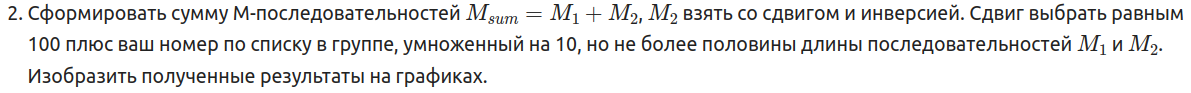

In [8]:
def invert(seq = []):
    for i in range(0, len(seq)-1):
        seq[i]*=-1
    return seq

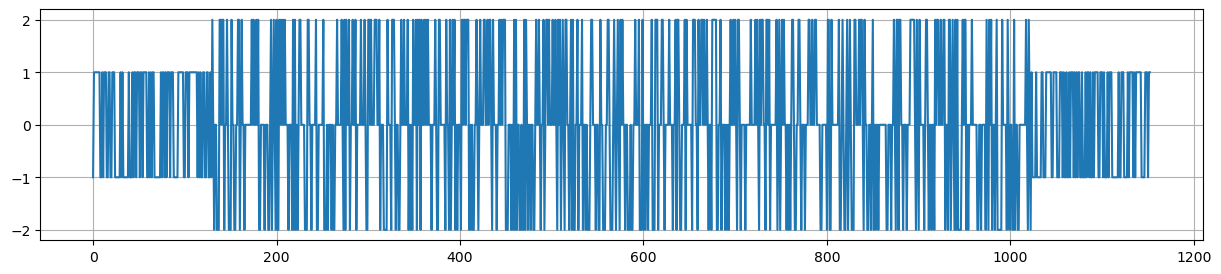

In [9]:
import copy as cp

shift_l = 100 + 10 * 3

# will be extended with zeros
M1_1 = cp.deepcopy(M1_arr)
M2_1 = cp.deepcopy(M2_arr)

Msum = np.insert(invert(M2_1), 0, [0] * shift_l) + np.append(M1_1, [0] * shift_l)

plt.figure(figsize=(15, 3))
plt.plot(Msum)
plt.grid(True)
plt.show()

#### 1.3
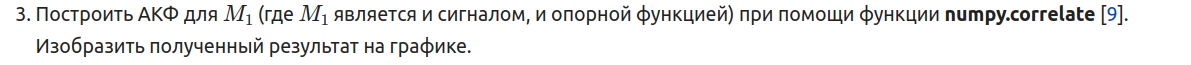

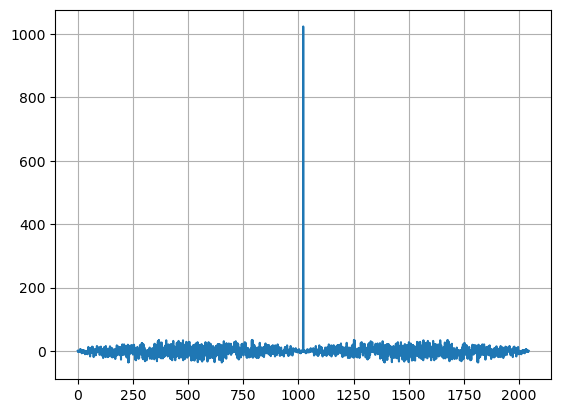

In [10]:
AKF = np.correlate(M1_arr, M1_arr, 'full')
plt.plot(AKF)
plt.grid(True)
plt.show()

#### 1.4
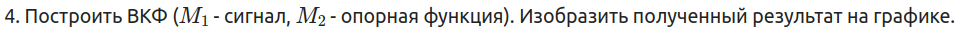

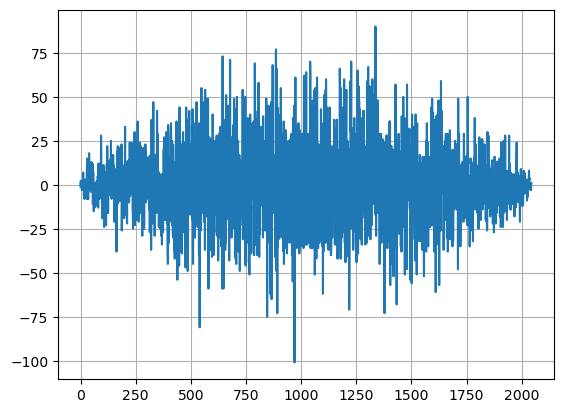

In [11]:
VKF = np.correlate(M1_arr, M2_arr, 'full')
plt.plot(VKF)
plt.grid(True)
plt.show()

#### 1.5
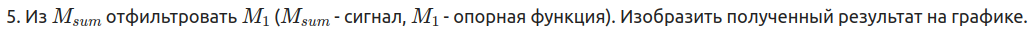

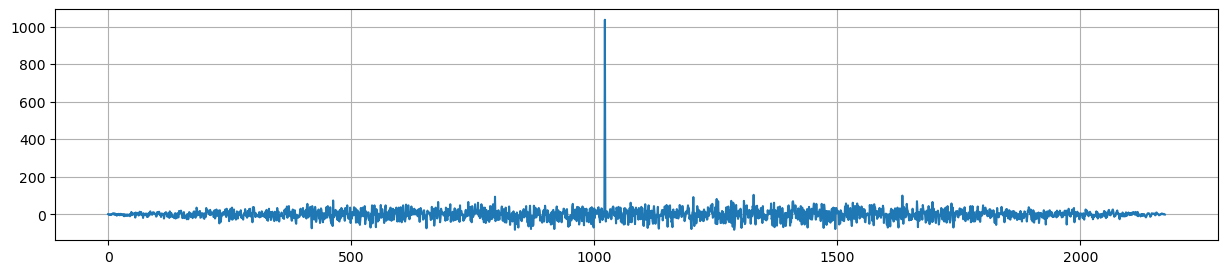

In [12]:
M1_filter = np.correlate(Msum, M1_arr, 'full')
plt.figure(figsize=(15, 3))
plt.plot(M1_filter)
plt.grid(True)
plt.show()

#### 1.6
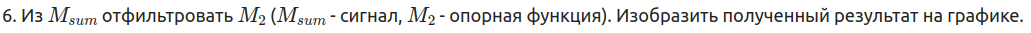

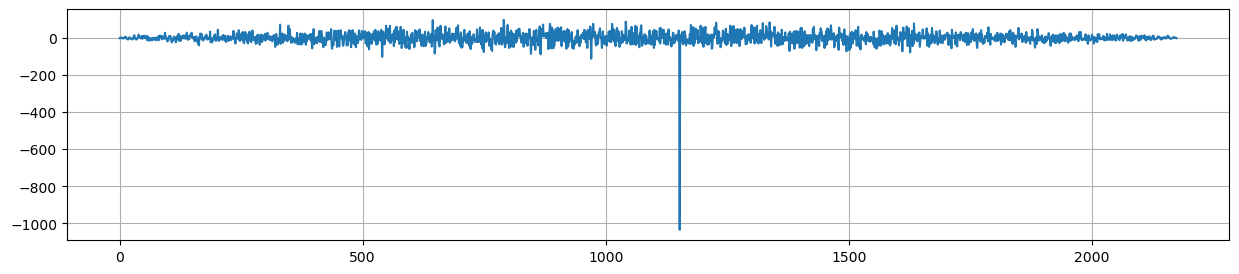

In [13]:
M2_filter = np.correlate(Msum, M2_arr, 'full')
plt.figure(figsize=(15, 3))
plt.plot(M2_filter)
plt.grid(True)
plt.show()

#### 1.7
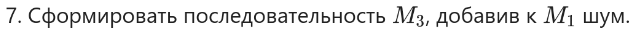

In [14]:
import random

M_noise = []
for i in range(0, M_seq_len):
  M_noise.append(random.randint(0, 1))

M_noise_arr = np.array(M_noise, dtype=np.int32)

# getting M_noise levels
for i in range(0, len(M_noise_arr)):
  M_noise_arr[i] = 1 if (M_noise_arr[i] == 0) else -1

M3_arr = M1_arr + M_noise_arr

#### 1.8
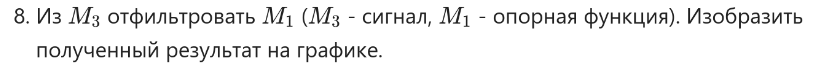

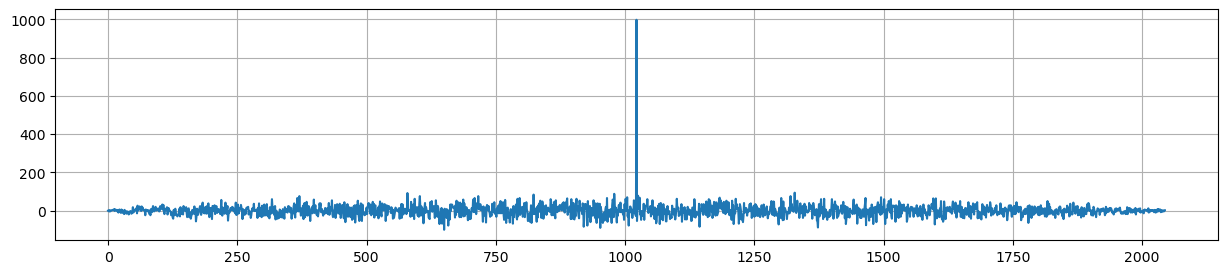

In [15]:
M3_filter = np.correlate(M1_arr, M3_arr, 'full')
plt.figure(figsize=(15, 3))
plt.plot(M3_filter)
plt.grid(True)
plt.show()

#### 1.9
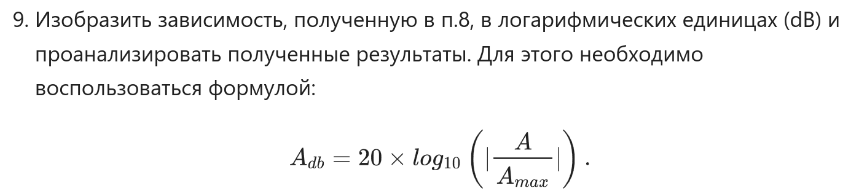

/tmp/ipykernel_17630/281915406.py:6: RuntimeWarning: divide by zero encountered in log10
  M3_filter_db.append(20 * np.log10(abs(M3_filter[i] / np.max(M3_filter))))


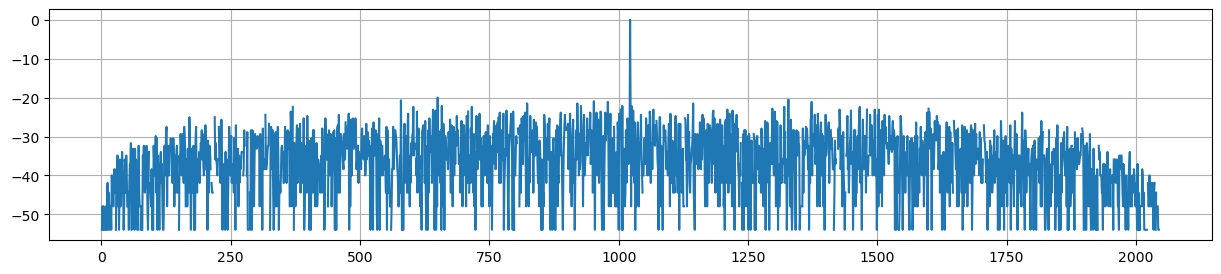

In [16]:
import math

M3_filter_db = []

for i in range(0, len(M3_filter)):
  M3_filter_db.append(20 * np.log10(abs(M3_filter[i] / np.max(M3_filter))))

plt.figure(figsize=(15, 3))
plt.plot(M3_filter_db)
plt.grid(True)
plt.show()

#### 1.10
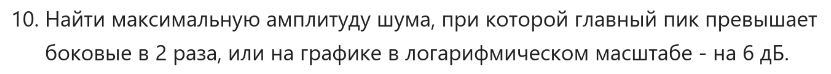

In [17]:
def find_max_indices(lst):
    # Use enumerate to get both the element and its index
    indexed_list = list(enumerate(lst))
    
    # Sort the indexed list by the values in descending order
    sorted_list = sorted(indexed_list, key=lambda x: x[1], reverse=True)
    
    # Extract indices of the first and second maximum values
    max_index1 = sorted_list[0][0]
    max_index2 = sorted_list[1][0]
    max_index3 = sorted_list[1][0]
    
    return max_index1, max_index2, max_index3

[-1  1  1 ...  1 -1 -1]
Max A: 10


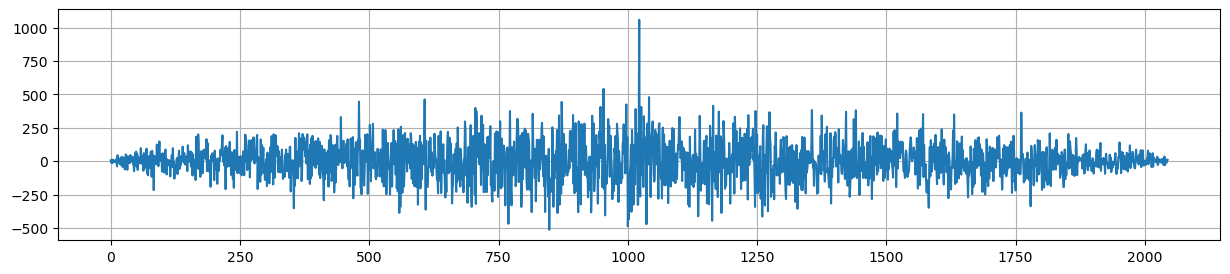

In [18]:
M_noise2 = []

random.seed(224)

A = 10
for i in range(0, M_seq_len):
  M_noise2.append(random.randint(-A, A))

M_noise2_arr = np.array(M_noise2, dtype=np.int32)

print(M1_arr)

M4_arr = M1_arr + M_noise2_arr

print(f'Max A: {A}')

M4_filter = np.correlate(M1_arr, M4_arr, 'full')
plt.figure(figsize=(15, 3))
plt.plot(M4_filter)
plt.grid(True)
plt.show()


## 2. Синтез и фильтрация кодов Уолша-Адамара
#### 2.1
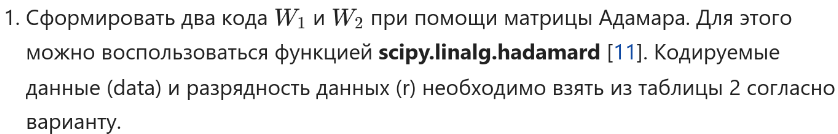

W1: [ 1 -1 -1 ... -1 -1  1]
W2: [ 1 -1  1 ... -1  1 -1]


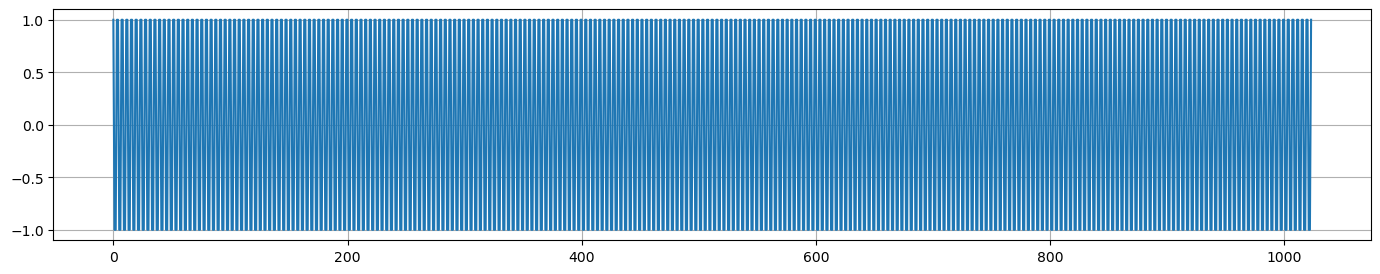

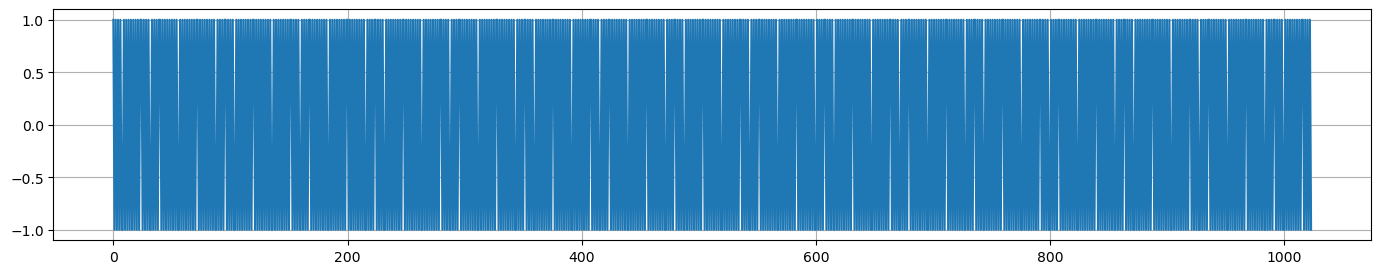

In [19]:
import scipy.linalg

data1 = 3
data2 = 121
r = 10

W1_mtrx = scipy.linalg.hadamard(2**r)
W2_mtrx = scipy.linalg.hadamard(2**r)

W1 = W1_mtrx[data1]
W2 = W2_mtrx[data2]

W1_arr = np.array(W1, dtype=np.int32)
W2_arr = np.array(W2, dtype=np.int32)

print(f'W1: {W1_arr}')
print(f'W2: {W2_arr}')

plt.figure(figsize=(17, 3))
plt.plot(W1)
plt.grid(True)
plt.show()

plt.figure(figsize=(17, 3))
plt.plot(W2)
plt.grid(True)
plt.show()

W_examp = scipy.linalg.hadamard(2**3)[3]


#### 2.2
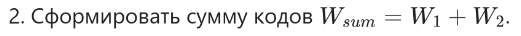

W_sum: [ 2 -2  0 ... -2  0  0]


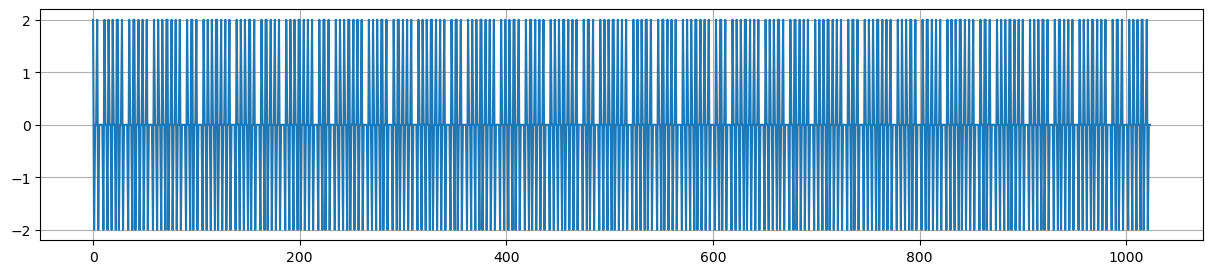

In [20]:
W_sum = W1 + W2
W_sum_arr = np.array(W_sum, dtype=np.int32)
print(f'W_sum: {W_sum}')

plt.figure(figsize=(15, 3))
plt.plot(W_sum_arr)
plt.grid(True)
plt.show()

#### 2.3
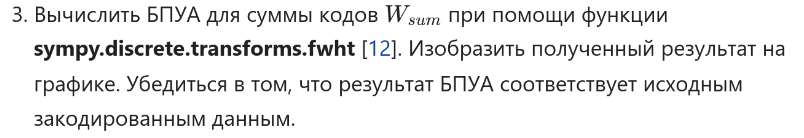

Our numbers: 3, 121


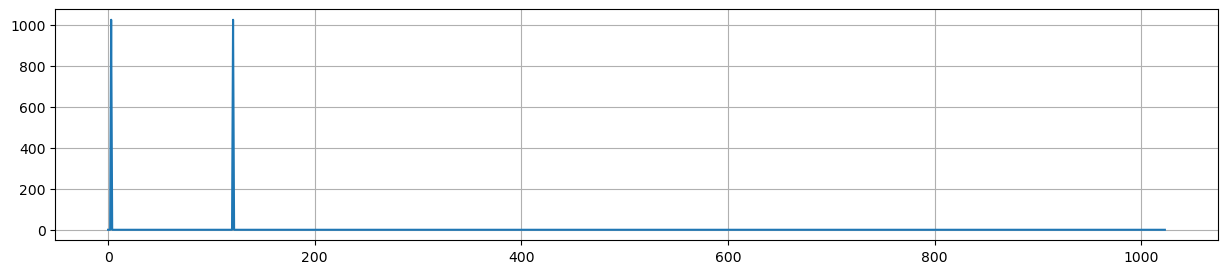

In [21]:
import sympy.discrete

FWHT = sympy.discrete.transforms.fwht(W_sum_arr)

FWHT_calc = sympy.discrete.transforms.fwht(W_sum_arr)
f_max, s_max, zero = find_max_indices(FWHT_calc)

print(f'Our numbers: {f_max}, {s_max}')

plt.figure(figsize=(15, 3))
plt.plot(FWHT)
plt.grid(True)
plt.show()

#### 2.4
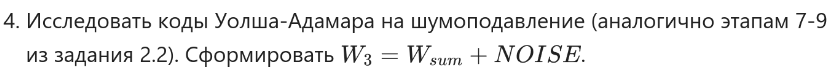

W3: [ 3  0  2 ... -1 -1 -1]


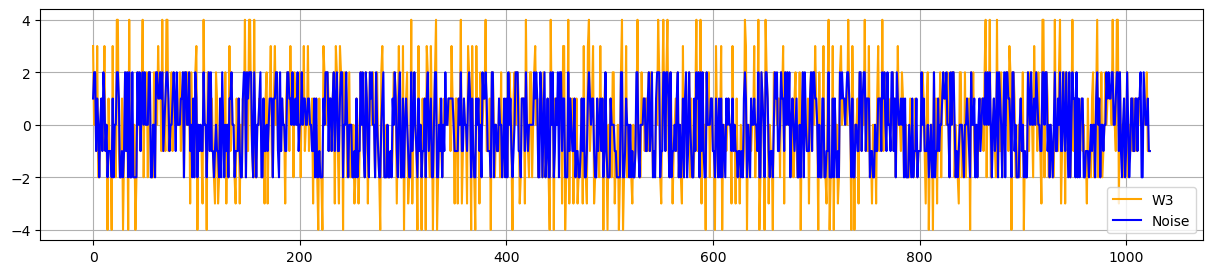

In [22]:
W_noise = []

for i in range(0, len(W_sum_arr)):
  W_noise.append(random.randint(-2, 2))

W_noise_arr = np.array(W_noise, dtype=np.int32)

W3_arr = W_sum_arr + W_noise_arr;

print(f'W3: {W3_arr}')

plt.figure(figsize=(15, 3))
plt.plot(W3_arr, label='W3', color='orange')
plt.plot(W_noise_arr, label='Noise', color='blue')
plt.legend()
plt.grid(True)
plt.show()

#### 2.5
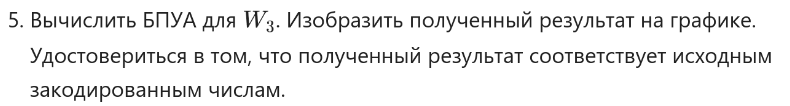

Our numbers: 121, 3


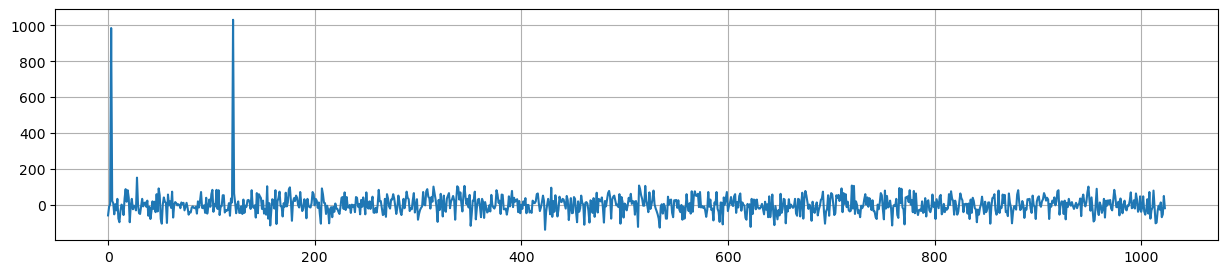

In [23]:
import sympy.discrete

FWHT = sympy.discrete.transforms.fwht(W3_arr)

FWHT_calc = sympy.discrete.transforms.fwht(W3_arr)
f_max, s_max, zero = find_max_indices(FWHT_calc)

print(f'Our numbers: {f_max}, {s_max}')

plt.figure(figsize=(15, 3))
plt.plot(FWHT)
plt.grid(True)
plt.show()

#### 2.6
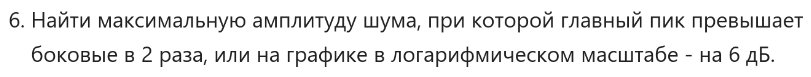

W4: [-1 -3 -4 ... -2  7 -6]


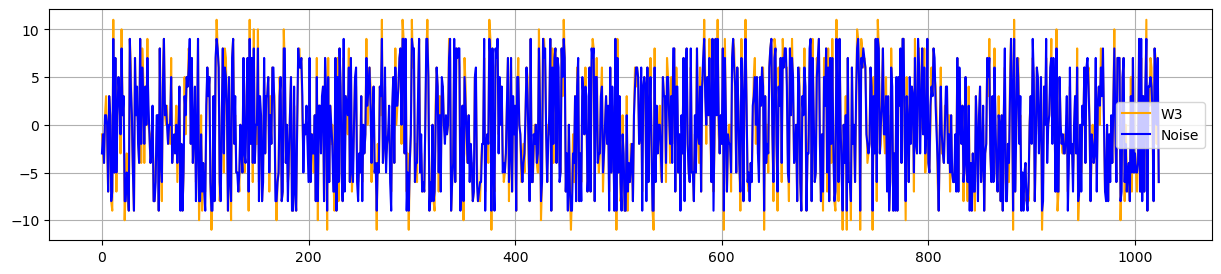

In [24]:
W_noise2 = []

A = 9
for i in range(0, len(W_sum_arr)):
  W_noise2.append(random.randint(-A, A))

W_noise2_arr = np.array(W_noise2, dtype=np.int32)

W4_arr = W_sum_arr + W_noise2_arr;

print(f'W4: {W4_arr}')

plt.figure(figsize=(15, 3))
plt.plot(W4_arr, label='W3', color='orange')
plt.plot(W_noise2_arr, label='Noise', color='blue')
plt.legend()
plt.grid(True)
plt.show()

Our numbers: 3, 121


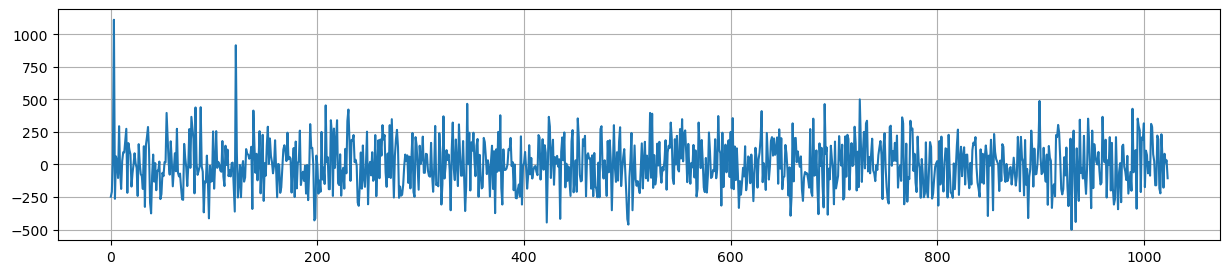

In [25]:
import sympy.discrete

FWHT = sympy.discrete.transforms.fwht(W4_arr)

FWHT_calc = sympy.discrete.transforms.fwht(W4_arr)
f_max, s_max, zero = find_max_indices(FWHT_calc)

print(f'Our numbers: {f_max}, {s_max}')

plt.figure(figsize=(15, 3))
plt.plot(FWHT)
plt.grid(True)
plt.show()

#### Extra Task
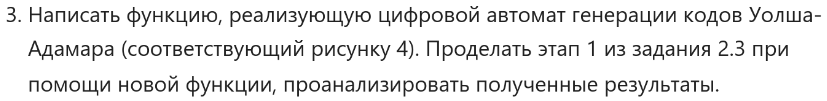

In [677]:
r = 10
data = 3

sh_reg = np.zeros(2**(r-1), dtype = np.int32)
C = np.zeros(r)
kf = np.binary_repr(data, width = r)

for i in range(0,r):
  C[i] = kf[i]

C = C.astype(np.int32)

C_list = C.tolist()
C_list.reverse()
C_inv = int("".join(str(x) for x in C_list), 2)

out_reg = []
shift_buf = 0

for stage in range(0,len(sh_reg)*2):
  # print('\nstage: ', stage)

  sh_reg = np.roll(sh_reg, 1)

  sh_reg[0] = shift_buf
  # print('reg: ', sh_reg)

  if stage == 0:
    limit = 2
    sh_i = 0
    c_i = 0
    shift_buf = 0
    out_reg.append(0)
  else:
    if stage == limit:
      sh_i = limit - 1
      limit *= 2
      c_i += 1

    # print('sh_i: ', sh_i, ' | c_i: ', c_i, ' | limit: ', limit)
    shift_buf = C[c_i] ^ sh_reg[sh_i]
    out_reg.append(C[c_i] ^ sh_reg[sh_i])

# inverting to levels like in WH code
for i in range(0, len(out_reg)):
  if out_reg[i] == 0:
    out_reg[i] = 1
  elif out_reg[i] == 1:
    out_reg[i] = -1

hadamard_matrix = scipy.linalg.hadamard(2**r)
W1 = hadamard_matrix[C_inv]

W1 = list(hadamard_matrix[C_inv])

print(out_reg == W1)

print('C: ', C)
print('Hadamar matrix: ', hadamard_matrix)
print('My result: ', out_reg)
print('From Hadamar matrix: ', list(W1))

True
C:  [0 0 0 0 0 0 0 0 1 1]
Hadamar matrix:  [[ 1  1  1 ...  1  1  1]
 [ 1 -1  1 ... -1  1 -1]
 [ 1  1 -1 ...  1 -1 -1]
 ...
 [ 1 -1  1 ... -1  1 -1]
 [ 1  1 -1 ...  1 -1 -1]
 [ 1 -1 -1 ... -1 -1  1]]
My result:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1,